In [1]:
# Capital Asset Pricing Model (CAPM)

In [2]:
from scipy import stats

In [3]:
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt

In [4]:
spy_etf = web.DataReader('SPY', 'yahoo')

In [5]:
spy_etf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-08-10,210.669998,209.279999,209.279999,210.570007,80270700.0,190.636444
2015-08-11,209.470001,207.759995,208.970001,208.669998,126081400.0,188.916321
2015-08-12,209.139999,205.360001,207.110001,208.919998,172123700.0,189.142624
2015-08-13,209.550003,208.009995,208.729996,208.660004,89383300.0,188.907227
2015-08-14,209.509995,208.259995,208.429993,209.419998,72786500.0,189.595306


In [6]:
start = pd.to_datetime('2015-08-10')

aapl = web.DataReader('AAPL', 'yahoo', start)

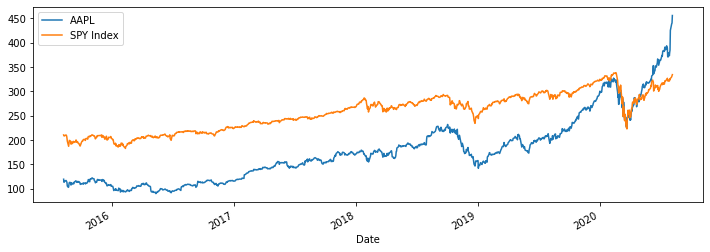

In [7]:
aapl['Close'].plot(label='AAPL', figsize=(12, 4))
spy_etf['Close'].plot(label='SPY Index')
plt.legend()

In [8]:
aapl['Cumulative'] = aapl['Close'] / aapl['Close'][0]
spy_etf['Cumulative'] = spy_etf['Close'] / spy_etf['Close'][0]

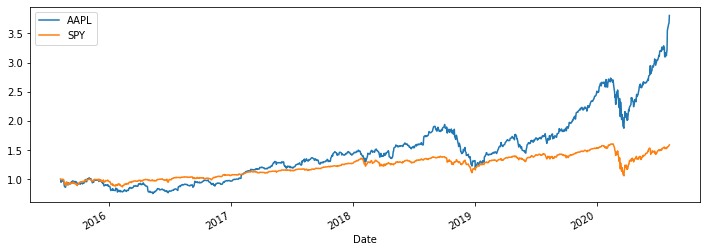

In [9]:
aapl['Cumulative'].plot(label='AAPL', figsize=(12, 4))
spy_etf['Cumulative'].plot(label='SPY')
plt.legend()

In [10]:
aapl['Daily Returns'] = aapl['Close'].pct_change(1)
spy_etf['Daily Returns'] = spy_etf['Close'].pct_change(1)

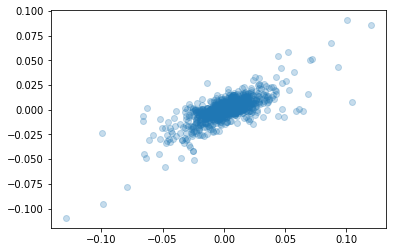

In [11]:
plt.scatter(aapl['Daily Returns'], spy_etf['Daily Returns'], alpha=0.25)

In [12]:
beta, alpha, r_value, p_value, std_error = stats.linregress(aapl['Daily Returns'].iloc[1:],
                                                            spy_etf['Daily Returns'].iloc[1:])


In [13]:
beta, alpha, r_value

(0.4942732805710053, -0.00016950124356102694, 0.7587367671420955)

In [14]:
import numpy as np

noise = np.random.normal(0, 0.001, len(spy_etf['Daily Returns'].iloc[1:]))

In [15]:
fake_stock = spy_etf['Daily Returns'].iloc[1:] + noise

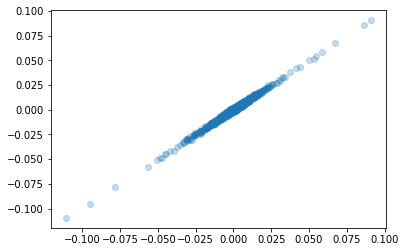

In [16]:
plt.scatter(fake_stock, spy_etf['Daily Returns'].iloc[1:], alpha=0.25)

In [17]:
beta, alpha, r_value, p_value, std_error = stats.linregress(fake_stock,
                                                            spy_etf['Daily Returns'].iloc[1:])


In [18]:
beta, alpha, r_value

(0.9961070507794305, -4.716449092556261e-06, 0.9964658868448374)